In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nibabel as nib
import cv2
from mlxtend.preprocessing import one_hot
import timeit
from random import shuffle
from MPC_tools import *
from layers import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


%matplotlib inline

# Making files path list

In [2]:
base_dir = '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data'

In [3]:
dir_path_list = []
filenames_list = []

for dirpath, dirnames, filenames in os.walk(base_dir):
    if 'model' in dirpath:
        dir_path_list.append(dirpath)

        temp_filenames_list=[]
        for i in range(len(filenames)):
            if 'sub' and 'npy' in filenames[i]:
                temp_filenames_list.append(filenames[i])
        filenames_list.append(temp_filenames_list)
        
dir_path_list = np.array(dir_path_list)
filenames_list = np.array(filenames_list)
filenames_list = np.sort(filenames_list, axis=1)

full_path_list = []

for i in range(dir_path_list.shape[0]):
    temp_path_list=[]
    for j in range(len(filenames_list[i])):
        temp_path = os.path.join(dir_path_list[i], filenames_list[i][j])
        temp_path_list.append(temp_path)
    full_path_list.append(temp_path_list)

full_path_list = np.array(full_path_list)

In [4]:
dir_path_list

array(['/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL',
       '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_Overall_FIR_SPM_SINGLE_TRIAL'],
      dtype='<U88')

In [5]:
filenames_list

array([['model02_FIR_SPM_SINGLE_TRIAL_sub-semic001.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic002.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic003.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic004.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic005.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic006.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic007.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic008.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic009.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic010.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic011.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic012.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic013.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic014.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic015.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic016.npy',
        'model02_FIR_SPM_SINGLE_TRIAL_sub-semic017.npy',
        'model02_FIR_SPM_SINGLE

In [6]:
full_path_list

array([['/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL/model02_FIR_SPM_SINGLE_TRIAL_sub-semic001.npy',
        '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL/model02_FIR_SPM_SINGLE_TRIAL_sub-semic002.npy',
        '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL/model02_FIR_SPM_SINGLE_TRIAL_sub-semic003.npy',
        '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL/model02_FIR_SPM_SINGLE_TRIAL_sub-semic004.npy',
        '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL/model02_FIR_SPM_SINGLE_TRIAL_sub-semic005.npy',
        '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL/model02_FIR_SPM_SINGLE_TRIAL_sub-semic006.npy',
        '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL/model02_FIR_SPM_SINGLE_TRIAL_sub-semic007.npy',
        '/home/cocoan-gpu1/D_drive

# Loading the data

In [7]:
def load_data(subjec_num):

    print("Loading {} data started ... ".format(filenames_list[0,subjec_num-1]))

    start = timeit.default_timer()

    X_stim = np.load(full_path_list[0,subjec_num-1])

    stop = timeit.default_timer()
    check_time = stop-start
    now = datetime.datetime.now()
    print("###  Duration Time  : {} minutes   {} seconds      ###".format(int(check_time)//60, int(check_time)%60))
    print("###  Excecuted Time : {}     ###".format(now))
    print('\n')


    print("Loading {} data started ... ".format(filenames_list[1,subjec_num-1]))

    start = timeit.default_timer()

    X_control = np.load(full_path_list[1,subjec_num-1])

    stop = timeit.default_timer()
    check_time = stop-start
    now = datetime.datetime.now()
    print("###  Duration Time  : {} minutes   {} seconds      ###".format(int(check_time)//60, int(check_time)%60))
    print("###  Excecuted Time : {}     ###".format(now))
    print('\n')
    
    print("{} data shape is {}".format(filenames_list[0,subjec_num-1], X_stim.shape))
    print("{} data shape is {}".format(filenames_list[1,subjec_num-1], X_control.shape))
    print('\n')
    
    
    return X_stim, X_control

# making_data_set

In [8]:
def making_data_set(X_stim, X_control, shuffle=False, nan_to_num=False, one_hot_y=False, flatten_X=False):
    
    print("Concatenating is started.")
    print("Shuffle is {}".format(shuffle))
    print("NaN to number is {}".format(nan_to_num))
    print("Y One hot transform is {}".format(one_hot_y))
    print("flatten X is {}".format(flatten_X))
    print("\n")

    
    stim_index_list = np.arange(0,X_stim.shape[0])
    
    if shuffle:
        np.random.shuffle(stim_index_list)
    
    X = np.concatenate((X_stim[stim_index_list[:X_control.shape[0]],:,:,:], X_control), axis=0)
    
    if nan_to_num:
        X = np.nan_to_num(X)
        
    if shuffle:
        index = np.arange(0,X.shape[0])
        np.random.shuffle(index)
        X = X[index,:,:,:]
    
    X = X[:,:,:,:,np.newaxis]
    
    if flatten_X:
        X = X.reshape((X.shape[0],-1))
    
    print("Concatenated data shape is : {}".format(X.shape))
    print("\n")

    
    Y_stim = np.ones(X_control.shape[0], dtype='i4')
    Y_control = np.zeros(X_control.shape[0], dtype='i4')
    Y = np.concatenate((Y_stim, Y_control), axis=0)
    
    if one_hot_y:
        from mlxtend.preprocessing import one_hot
        Y = one_hot(Y)
    
    if shuffle:
        Y = Y[index,:]
    
    print("Y shape is : {}".format(Y.shape))
    print("\n")

    return X, Y


# Making tensorflow graph

In [9]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def neural_net(x, num_classes=2):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1, activation=tf.nn.relu)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2, activation=tf.nn.relu)
    # Output fully connected layer with a neuron for each class
    #out_layer = tf.layers.dense(layer_2, num_classes, activation=tf.nn.sigmoid)
    return layer_2


def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

def batch_norm(data, is_train, name=None):
    return tf.layers.batch_normalization(data, training=is_train, name=name)

In [10]:
# Network Parameters
n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_classes = 2 

In [11]:
x = tf.placeholder(tf.float32,shape=[None, 592895])
y_true = tf.placeholder(tf.float32,shape=[None,num_classes])
is_train = tf.placeholder(tf.bool)
hold_prob = tf.placeholder(tf.float32)

In [12]:
dnn = neural_net(x, num_classes)

In [13]:
full_layer_one = tf.nn.relu(normal_full_layer(dnn,1024))
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [14]:
y_pred = normal_full_layer(full_one_dropout,2)

In [15]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))
#cross_entropy = tf.reduce_mean(tf.losses.softmax_cross_entropy(y_true,y_pred))
#cross_entropy = tf.reduce_mean(tf.losses.sigmoid_cross_entropy(y_true,y_pred))

#mse = tf.losses.mean_squared_error(y_true, y_pred)
learning_rate = 1e-5
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(cross_entropy)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# data count

total data = 4542

train data = 3633

validation data = 909

In [16]:
step_size = 30000

In [17]:
train_acc_list = []
train_entrop_list = []

test_acc_list = []
test_entrop_list = []

validation_acc_list = []
validataion_entrop_list = []

step_list = []

lowest_loss = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    
    subject_num = 1
    start = timeit.default_timer()

    for i in range(step_size):
        
        #Loading training and validation data sets
        if i%36 == 0 and i < step_size-44:
            X_stim, X_control = load_data(subject_num)
            
            if subject_num<59:
                subject_num +=1   
            
            elif subject_num>=59:
                subject_num =1    
            
            X, Y= making_data_set(X_stim, X_control, shuffle=True, nan_to_num=True, one_hot_y=True, flatten_X=True)
            del X_stim
            del X_control
            X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=101)
            del X
            del Y
            
            print("X_train shape is : {}".format(X_train.shape))
            print("X_val shape is : {}".format(X_val.shape))
            print("y_train shape is : {}".format(y_train.shape))
            print("y_val shape is : {}".format(y_val.shape))
            print("\n")

        #Load test data sets
        elif i == step_size-44:
            del X_train
            del X_val
            del y_train
            del y_val
            
            validate_subjec_num = 59
            X_stim, X_control = load_data(validate_subjec_num)
            X, Y= making_data_set(X_stim, X_control, shuffle=True, nan_to_num=True, one_hot_y=True, flatten_X=True)
            del X_stim
            del X_control
               
        matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
        acc = tf.reduce_mean(tf.cast(matches,tf.float32))
        
        #training model
        if i < step_size-44:
            j = i%36
            t = i%9
            _, train_entropy, train_accuracy = sess.run([train, cross_entropy, acc], 
                                                        feed_dict={x: X_train[j*100:j*100+100], 
                                                                   y_true: y_train[j*100:j*100+100], 
                                                                   hold_prob: 0.5, is_train:True})

            validation_entropy, validation_accuracy= sess.run([cross_entropy, acc],
                                                  feed_dict={x:X_val[t*100:t*100+100], 
                                                             y_true:y_val[t*100:t*100+100], 
                                                             hold_prob:1.0, is_train:False})
            if i%10 == 0:
                print("* * * * * * * * * * * * *")
                print('Currently on step {}'.format(i))
                print('##Train Cross entropy is: {}'.format(train_entropy))
                print('##Train Accuracy is: {}'.format(train_accuracy))
                print('\n')
                print('##Validation Cross entropy is: {}'.format(validation_entropy))
                print('##Validation Accuracy is: {}'.format(validation_accuracy))

                print("* * * * * * * * * * * * *")
                print('\n')
                
            train_acc_list.append(train_accuracy)
            train_entrop_list.append(train_entropy)
            
            validation_acc_list.append(validation_accuracy)
            validataion_entrop_list.append(validation_entropy)
            
            step_list.append(i)

        #testing model
        elif i > step_size-44:
            j = i%44
            test_entropy, test_accuracy= sess.run([cross_entropy, acc],
                                                  feed_dict={x:X[j*100:j*100+100], 
                                                             y_true:Y[j*100:j*100+100], 
                                                             hold_prob:1.0, is_train:False})

            test_acc_list.append(test_accuracy)
            test_entrop_list.append(test_entropy)
            
            step_list.append(i)
            
            if i%1 == 0:
                print("* * * * * * * * * * * * *")
                print('Currently on step {}'.format(i))
                print('##Test Cross entropy is: {}'.format(test_entropy))
                print('##Test Accuracy is: {}'.format(test_accuracy))

                print("* * * * * * * * * * * * *")
                print('\n')
            
        if lowest_loss == None or lowest_loss > validation_entropy:
            lowest_loss = validation_entropy
            saver.save(sess, "./model/MPC_dnn_basic_SEMIC_binary_classification_ver2.ckpt")
    
    
    train_acc_list = np.array(train_acc_list)
    train_entrop_list = np.array(train_entrop_list)
    
    test_entrop_list = np.array(test_entrop_list)
    test_acc_list = np.array(test_acc_list)
    
    validation_acc_list = np.array(validation_acc_list)
    validataion_entrop_list = np.array(validataion_entrop_list)
    
    step_list = np.array(step_list)
    
    stop = timeit.default_timer()
    check_time = stop-start
    now = datetime.datetime.now()

    print("!!!!Finished!!!!")
    print("###  Duration Time  : {} minutes   {} seconds      ###".format(int(check_time)//60, int(check_time)%60))
    print("###  Excecuted Time : {}     ###".format(now))

Loading model02_FIR_SPM_SINGLE_TRIAL_sub-semic001.npy data started ... 
###  Duration Time  : 1 minutes   13 seconds      ###
###  Excecuted Time : 2019-04-17 19:08:21.034028     ###


Loading model02_Overall_FIR_SPM_SINGLE_TRIAL_sub-semic001.npy data started ... 
###  Duration Time  : 0 minutes   31 seconds      ###
###  Excecuted Time : 2019-04-17 19:08:52.713825     ###


model02_FIR_SPM_SINGLE_TRIAL_sub-semic001.npy data shape is (6051, 79, 95, 79)
model02_Overall_FIR_SPM_SINGLE_TRIAL_sub-semic001.npy data shape is (2271, 79, 95, 79)


Concatenating is started.
Shuffle is True
NaN to number is True
Y One hot transform is True
flatten X is True


Concatenated data shape is : (4542, 592895)


Y shape is : (4542, 2)


X_train shape is : (3633, 592895)
X_val shape is : (909, 592895)
y_train shape is : (3633, 2)
y_val shape is : (909, 2)


* * * * * * * * * * * * *
Currently on step 0
##Train Cross entropy is: 0.7226462364196777
##Train Accuracy is: 0.5400000214576721


##Validation Cro

* * * * * * * * * * * * *
Currently on step 160
##Train Cross entropy is: 0.4212113320827484
##Train Accuracy is: 0.8299999833106995


##Validation Cross entropy is: 0.41638249158859253
##Validation Accuracy is: 0.8399999737739563
* * * * * * * * * * * * *


* * * * * * * * * * * * *
Currently on step 170
##Train Cross entropy is: 0.3842175602912903
##Train Accuracy is: 0.8100000023841858


##Validation Cross entropy is: 0.29758667945861816
##Validation Accuracy is: 0.8899999856948853
* * * * * * * * * * * * *


Loading model02_FIR_SPM_SINGLE_TRIAL_sub-semic006.npy data started ... 
###  Duration Time  : 1 minutes   14 seconds      ###
###  Excecuted Time : 2019-04-17 19:20:50.590398     ###


Loading model02_Overall_FIR_SPM_SINGLE_TRIAL_sub-semic006.npy data started ... 
###  Duration Time  : 0 minutes   33 seconds      ###
###  Excecuted Time : 2019-04-17 19:21:24.007943     ###


model02_FIR_SPM_SINGLE_TRIAL_sub-semic006.npy data shape is (6051, 79, 95, 79)
model02_Overall_FIR_SPM_S

Concatenated data shape is : (4542, 592895)


Y shape is : (4542, 2)


X_train shape is : (3633, 592895)
X_val shape is : (909, 592895)
y_train shape is : (3633, 2)
y_val shape is : (909, 2)


* * * * * * * * * * * * *
Currently on step 330
##Train Cross entropy is: 0.39581048488616943
##Train Accuracy is: 0.8100000023841858


##Validation Cross entropy is: 0.39265209436416626
##Validation Accuracy is: 0.800000011920929
* * * * * * * * * * * * *


* * * * * * * * * * * * *
Currently on step 340
##Train Cross entropy is: 0.2612416446208954
##Train Accuracy is: 0.9200000166893005


##Validation Cross entropy is: 0.21145227551460266
##Validation Accuracy is: 0.9300000071525574
* * * * * * * * * * * * *


* * * * * * * * * * * * *
Currently on step 350
##Train Cross entropy is: 0.25567173957824707
##Train Accuracy is: 0.9200000166893005


##Validation Cross entropy is: 0.18906468152999878
##Validation Accuracy is: 0.9200000166893005
* * * * * * * * * * * * *


Loading model02_FIR_SPM_SINGL

Loading model02_FIR_SPM_SINGLE_TRIAL_sub-semic015.npy data started ... 
###  Duration Time  : 1 minutes   15 seconds      ###
###  Excecuted Time : 2019-04-17 19:42:42.613438     ###


Loading model02_Overall_FIR_SPM_SINGLE_TRIAL_sub-semic015.npy data started ... 
###  Duration Time  : 1 minutes   16 seconds      ###
###  Excecuted Time : 2019-04-17 19:45:13.806198     ###


Loading model02_Overall_FIR_SPM_SINGLE_TRIAL_sub-semic016.npy data started ... 
###  Duration Time  : 0 minutes   34 seconds      ###
###  Excecuted Time : 2019-04-17 19:45:47.851261     ###


model02_FIR_SPM_SINGLE_TRIAL_sub-semic016.npy data shape is (6051, 79, 95, 79)
model02_Overall_FIR_SPM_SINGLE_TRIAL_sub-semic016.npy data shape is (2271, 79, 95, 79)


Concatenating is started.
Shuffle is True
NaN to number is True
Y One hot transform is True
flatten X is True


Concatenated data shape is : (4542, 592895)


Y shape is : (4542, 2)


X_train shape is : (3633, 592895)
X_val shape is : (909, 592895)
y_train shape

MemoryError: 

# Visualize result

In [27]:
result_list = pd.DataFrame({"train_acc_list":train_acc_list,"validation_acc_list":validation_acc_list,
                            "train_entrop_list":train_entrop_list,"validation_entrop_list":validataion_entrop_list,
                            "test_acc_list":test_acc_list, "test_entrop_list":test_entrop_list,
                            "step":step_list})
result_list.head()

,train_acc_list,validation_acc_list,train_entrop_list,validation_entrop_list,step
0,0.57,0.88,0.706408,0.489905,0
1,0.76,0.87,0.544756,0.419593,1
2,0.85,0.93,0.418098,0.298220,2
3,0.88,0.86,0.289447,0.311532,3
4,0.89,0.89,0.311330,0.266203,4


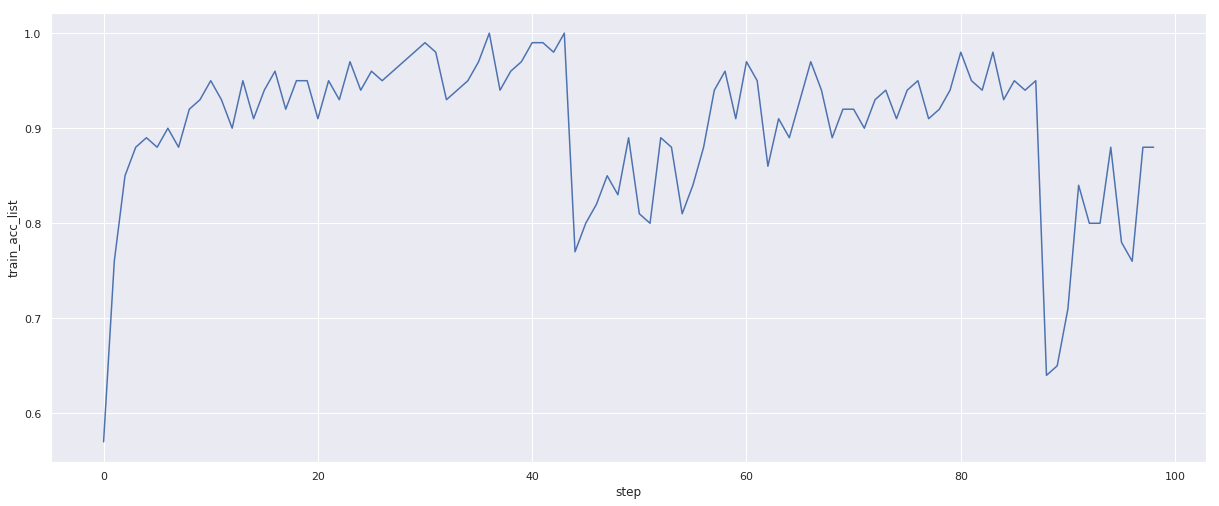

In [28]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["train_acc_list"])

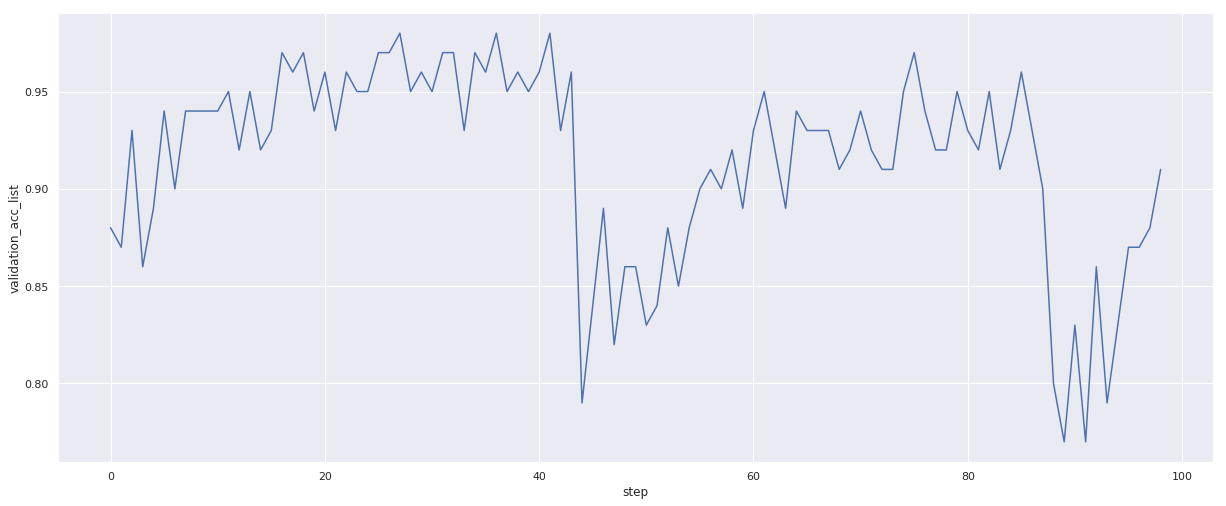

In [30]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["validation_acc_list"])

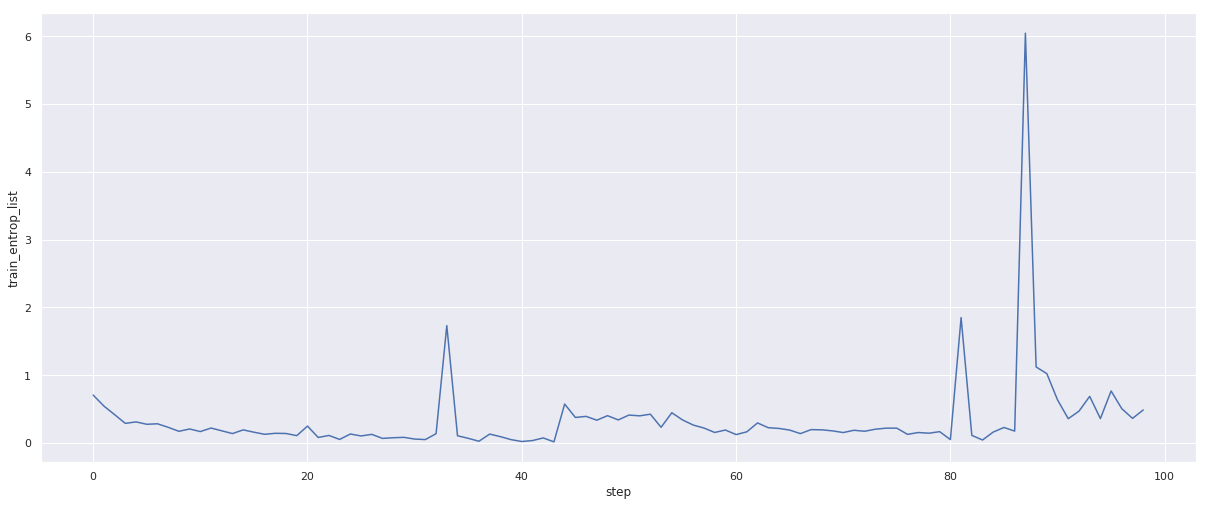

In [31]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["train_entrop_list"])

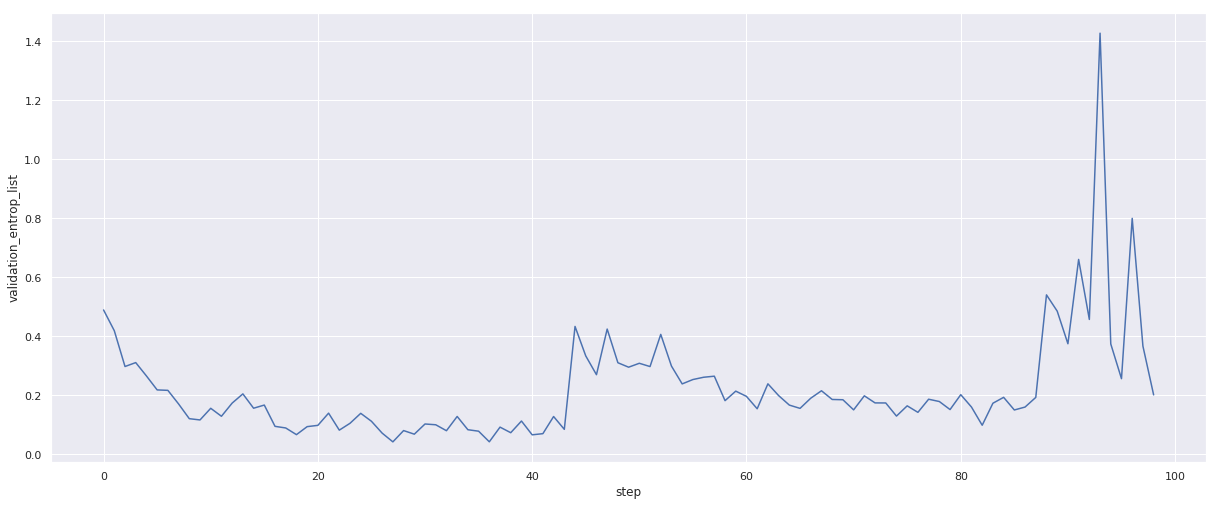

In [33]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["validation_entrop_list"])

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["test_acc_list"])

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["test_entrop_list"])